The aim of this project is to use dimesionality reduction technique Principal Component Analysis (PCA) for optimization and diversification of portfolio consisting of Mutual Funds.

The dataset used consists of Net Asset Value (NAV) of 40 Mutual Funds. The data has been taken from Moneycontrol.com

## 1.1. Loading the python packages

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Import Model Packages 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

## 1.2. Loading the Data

In [2]:
# load dataset
dataset = read_csv('MF_5_cdata.csv',index_col=0)

In [3]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
## 2. Exploratory Data Analysis

<a id='2.1'></a>
## 2.1. Descriptive Statistics

In [5]:
# shape
dataset.shape

(1268, 40)

In [6]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,KEEF_NAV,CRBEF_NAV,ELCF_NAV,FIBF_NAV,BATAF_NAV,CRETF_NAV,KTSF_NAV,TIVF_NAV,IPVDF_NAV,LBCF_NAV,...,IPFEF_NAV,KIaERF_NAV,MMMCUY_NAV,ITA(F_NAV,NIVF_NAV,PIFCF_NAV,ULTEF_NAV,MMMCBY_NAV,SIF_NAV,ISVF_NAV
NAV_date,,,,,,,,,,,,,,,,,,,,,
2016-08-01,31.553,19.08,27.72,396.4397,41.76,48.58,33.221,203.5745,127.77,13.063,...,25.79,17.508,9.3492,42.7980,56.6079,10.85,21.06,10.0138,13.1974,39.4859
2016-08-02,31.457,19.01,27.72,396.0260,41.43,48.31,33.111,201.9070,127.16,12.976,...,25.68,17.526,9.4357,42.4304,56.5693,10.81,21.00,10.0241,13.1441,39.1246
2016-08-03,31.065,18.88,27.42,393.7926,41.01,47.98,32.687,199.9500,126.40,12.799,...,25.61,17.363,9.5710,41.8771,56.0626,10.68,20.80,10.0454,12.9360,38.4728
2016-08-04,31.189,18.85,27.40,394.7902,41.01,47.96,32.785,200.6811,126.55,12.794,...,25.68,17.434,9.5610,41.6535,56.1935,10.69,20.83,10.0375,13.0172,38.1950
2016-08-05,31.597,19.17,27.76,401.4173,41.64,48.66,33.341,204.4463,128.30,13.039,...,26.07,17.677,9.7039,42.4795,57.2186,10.87,21.05,10.0318,13.1534,38.7973


In [7]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

KEEF_NAV       float64
CRBEF_NAV      float64
ELCF_NAV       float64
FIBF_NAV       float64
BATAF_NAV      float64
CRETF_NAV      float64
KTSF_NAV       float64
TIVF_NAV       float64
IPVDF_NAV      float64
LBCF_NAV       float64
QAF_NAV        float64
SCF_NAV        float64
ABSLTP_NAV     float64
NLCEF_NAV      float64
QTP_NAV        float64
MMEKBY_NAV     float64
ASCF_NAV       float64
DTSF_NAV       float64
SMMF_NAV       float64
MATSF_NAV      float64
IFEF_NAV       float64
NIFEF_NAV      float64
ABF_NAV        float64
DNRANEF_NAV    float64
MAEBF_NAV      float64
KBF_NAV        float64
SFEF_NAV       float64
CRFCF_NAV      float64
KSCF_NAV       float64
PILTEF_NAV     float64
IPFEF_NAV      float64
KIaERF_NAV     float64
MMMCUY_NAV     float64
ITA(F_NAV      float64
NIVF_NAV       float64
PIFCF_NAV      float64
ULTEF_NAV      float64
MMMCBY_NAV     float64
SIF_NAV        float64
ISVF_NAV       float64
dtype: object

In [8]:
# describe data
set_option('precision', 3)
dataset.describe()

,KEEF_NAV,CRBEF_NAV,ELCF_NAV,FIBF_NAV,BATAF_NAV,CRETF_NAV,KTSF_NAV,TIVF_NAV,IPVDF_NAV,LBCF_NAV,...,IPFEF_NAV,KIaERF_NAV,MMMCUY_NAV,ITA(F_NAV,NIVF_NAV,PIFCF_NAV,ULTEF_NAV,MMMCBY_NAV,SIF_NAV,ISVF_NAV
count,1268.000,1268.000,1268.000,1268.000,1268.000,1268.000,1268.000,1268.000,1268.000,1268.000,...,1268.000,1268.000,894.000,1268.000,1268.000,1268.000,1268.000,1074.000,1268.000,1268.000
mean,41.925,26.137,35.794,472.402,56.584,66.520,42.787,252.863,151.949,15.552,...,31.275,21.149,10.297,57.501,70.997,14.424,25.181,11.887,15.499,51.312
std,8.368,5.442,6.300,71.007,12.166,14.347,6.902,41.028,23.432,2.179,...,4.917,3.125,1.857,11.111,11.528,3.304,4.049,2.131,2.219,9.967
min,29.713,17.230,24.510,326.835,36.400,45.000,31.085,155.460,103.650,10.268,...,22.330,13.945,7.332,37.270,48.223,9.770,17.900,8.397,10.551,30.410
25%,37.601,23.000,31.660,435.305,49.810,58.330,39.228,228.139,139.947,14.063,...,28.300,18.961,9.217,50.920,64.425,12.748,22.860,10.691,14.044,44.501
50%,40.575,24.825,35.005,464.847,54.280,63.135,41.352,252.414,149.020,15.601,...,30.505,21.212,9.679,57.360,70.906,13.600,24.280,11.176,15.229,51.510
75%,43.289,28.460,38.332,490.521,59.970,70.373,44.791,273.011,155.412,16.700,...,32.252,22.732,10.401,60.883,74.432,14.582,26.053,12.193,16.443,56.885
max,72.006,41.760,53.620,705.339,96.580,110.780,65.294,380.499,233.430,21.683,...,47.850,31.080,16.678,94.330,108.706,25.740,38.680,19.552,23.051,82.720


<a id='3'></a>
## 3. Data Preparation

<a id='3.1'></a>
## 3.1. Data Cleaning
Let us check for the NAs in the rows, either drop them or fill them with the mean of the column

In [10]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


Getting rid of the columns with more than 30% missing values. 

In [11]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(1268, 40)

Given that there are null values drop the rown contianing the null values.

In [12]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Drop the rows containing NA
dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

dataset.tail(2)

,KEEF_NAV,CRBEF_NAV,ELCF_NAV,FIBF_NAV,BATAF_NAV,CRETF_NAV,KTSF_NAV,TIVF_NAV,IPVDF_NAV,LBCF_NAV,...,IPFEF_NAV,KIaERF_NAV,MMMCUY_NAV,ITA(F_NAV,NIVF_NAV,PIFCF_NAV,ULTEF_NAV,MMMCBY_NAV,SIF_NAV,ISVF_NAV
NAV_date,,,,,,,,,,,,,,,,,,,,,
2021-06-30,71.822,41.59,53.44,698.939,96.51,110.55,65.000,377.779,230.58,21.529,...,47.56,31.080,16.678,94.09,108.581,25.74,38.67,19.546,23.031,82.20
2021-07-01,72.006,41.54,53.48,698.991,96.58,110.53,65.009,378.181,231.13,21.606,...,47.55,30.957,16.678,94.33,108.581,25.65,38.59,19.546,23.051,82.72


Computing Daily Return

In [13]:
# Daily Log Returns (%)
# datareturns = np.log(data / data.shift(1)) 

# Daily Linear Returns (%)
datareturns = dataset.pct_change(1)

#Remove Outliers beyong 3 standard deviation
datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

<a id='3.2'></a>
## 3.2. Data Transformation

All the variables should be on the same scale before applying PCA, otherwise a feature with large values will dominate the result. Below we use StandardScaler in sklearn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

Standardization is a useful technique to transform attributes to a standard Normal distribution with a mean of
0 and a standard deviation of 1.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns),columns = datareturns.columns, index = datareturns.index)
# summarize transformed data
datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(2)

,KEEF_NAV,CRBEF_NAV,ELCF_NAV,FIBF_NAV,BATAF_NAV,CRETF_NAV,KTSF_NAV,TIVF_NAV,IPVDF_NAV,LBCF_NAV,...,IPFEF_NAV,KIaERF_NAV,MMMCUY_NAV,ITA(F_NAV,NIVF_NAV,PIFCF_NAV,ULTEF_NAV,MMMCBY_NAV,SIF_NAV,ISVF_NAV
NAV_date,,,,,,,,,,,,,,,,,,,,,
2016-08-02,-0.548,-0.631,-0.129,-0.224,-1.081,-0.900,-0.577,-1.040,-0.754,-0.869,...,-0.656,0.031,1.305,-1.192,-0.195,-0.603,-0.510,0.050,-0.577,-1.162
2016-08-03,-1.823,-1.064,-1.546,-0.788,-1.353,-1.076,-1.880,-1.211,-0.920,-1.678,...,-0.452,-1.291,2.081,-1.744,-1.205,-1.650,-1.435,0.202,-1.985,-2.016


<a id='4'></a>
## 4. Evaluate Algorithms and Models

<a id='4.1'></a>
## 4.1. Train Test Split

The portfolio is divided into train and test split to perform the analysis regarding the best porfolio and backtesting shown later. 

In [16]:
# Dividing the dataset into training and testing sets
percentage = int(len(rescaledDataset) * 0.80)
X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]

X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]


stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)

In [17]:
X_test.head()

,KEEF_NAV,CRBEF_NAV,ELCF_NAV,FIBF_NAV,BATAF_NAV,CRETF_NAV,KTSF_NAV,TIVF_NAV,IPVDF_NAV,LBCF_NAV,...,IPFEF_NAV,KIaERF_NAV,MMMCUY_NAV,ITA(F_NAV,NIVF_NAV,PIFCF_NAV,ULTEF_NAV,MMMCBY_NAV,SIF_NAV,ISVF_NAV
NAV_date,,,,,,,,,,,,,,,,,,,,,
2020-07-07,0.540,0.456,1.448,-0.063,0.543,1.024,0.042,0.220,-0.551,-0.433,...,-0.551,-0.980,-0.105,0.509,0.207,0.635,0.441,0.775,-1.113,0.557
2020-07-08,-1.180,-1.391,0.523,-0.682,-0.995,-1.400,-1.169,-0.616,-0.888,-1.058,...,-1.139,-1.661,-0.105,-0.972,-0.896,1.315,-1.056,-2.260,-1.120,-0.742
2020-07-09,0.322,0.851,-1.174,1.171,1.209,1.126,0.249,0.639,1.056,0.753,...,1.091,-0.225,-0.105,0.935,0.679,0.368,1.167,-0.268,0.596,0.530
2020-07-10,-0.776,-0.518,1.034,-1.424,-0.143,-0.394,-0.025,-1.368,-0.292,-0.722,...,-0.719,-0.225,-0.105,-0.689,-0.583,0.281,-0.391,0.676,-0.085,-0.634
2020-07-13,-0.252,0.212,-0.489,-0.131,-0.164,0.230,0.271,-0.072,0.639,0.005,...,1.002,0.148,-0.105,0.296,0.227,1.036,-0.060,-0.148,0.691,0.096


<a id='4.2'></a>
## 4.2. Model Evaluation- Applying Principle Component Analysis

In [18]:
pca = PCA()
PrincipalComponent=pca.fit(X_train)

### First Principal Component /Eigenvector

In [19]:
print(pca.components_[0])
print(len(pca.components_))
#print(len())

[-0.1820793  -0.18157665 -0.1267988  -0.16997616 -0.18169382 -0.17865473
 -0.18874525 -0.17624643 -0.1676936  -0.18409554 -0.08281589 -0.18262306
 -0.17791738 -0.18226962 -0.07985004 -0.00546245 -0.15960893 -0.04710747
 -0.17589214 -0.13288614 -0.17888999 -0.18128353 -0.16658898 -0.00836009
 -0.13713497 -0.18425277 -0.17135045 -0.18694263 -0.18076301 -0.14001468
 -0.15901846 -0.17552845  0.00023069 -0.18710788 -0.18823522 -0.14598477
 -0.18174689  0.01137524 -0.17385314 -0.18500549]
40


<a id='4.2.1'></a>
## 4.2.1.Explained Variance using PCA

,Explained Variance
0,65.78%
1,71.55%
2,75.32%
3,78.67%
4,81.78%
5,84.38%
6,86.70%
7,88.96%
8,90.68%
9,91.96%


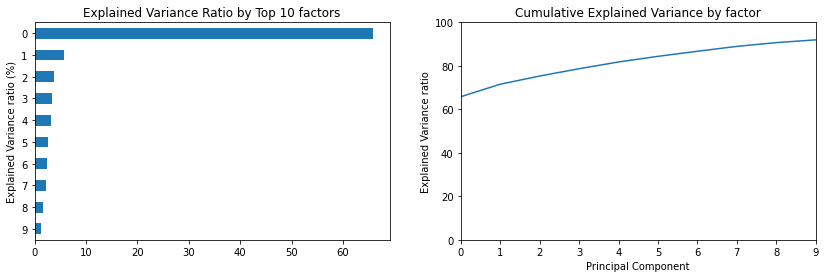

In [20]:
NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), xlabel = "Explained Variance ratio (%)", ylabel="Principal Component",title='Explained Variance Ratio by Top 10 factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by factor', ylabel = "Explained Variance ratio", xlabel = 'Principal Component');
# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

We find that the most important factor explains around 60% of the daily return variation. The dominant factor is usually interpreted as ‘the market’, depending on the results of closer inspection.

The plot on the right shows the cumulative explained variance and indicates that around 10 factors explain 95% of the returns of this large cross-section of stocks.  

In [21]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

In [22]:
weights[0]


array([ 3.09424567e-02,  3.08570355e-02,  2.15481190e-02,  2.88856550e-02,
        3.08769477e-02,  3.03604869e-02,  3.20752633e-02,  2.99512220e-02,
        2.84977585e-02,  3.12850951e-02,  1.40736864e-02,  3.10348617e-02,
        3.02351811e-02,  3.09747986e-02,  1.35696724e-02,  9.28286403e-04,
        2.71238540e-02,  8.00541703e-03,  2.98910143e-02,  2.25825970e-02,
        3.04004672e-02,  3.08072238e-02,  2.83100392e-02,  1.42070891e-03,
        2.33046409e-02,  3.13118146e-02,  2.91192006e-02,  3.17689283e-02,
        3.07187663e-02,  2.37940168e-02,  2.70235088e-02,  2.98292087e-02,
       -3.92041234e-05,  3.17970094e-02,  3.19885893e-02,  2.48085710e-02,
        3.08859657e-02, -1.93310267e-03,  2.95445072e-02,  3.14397314e-02])

In [23]:
pca.components_[0]

array([-0.1820793 , -0.18157665, -0.1267988 , -0.16997616, -0.18169382,
       -0.17865473, -0.18874525, -0.17624643, -0.1676936 , -0.18409554,
       -0.08281589, -0.18262306, -0.17791738, -0.18226962, -0.07985004,
       -0.00546245, -0.15960893, -0.04710747, -0.17589214, -0.13288614,
       -0.17888999, -0.18128353, -0.16658898, -0.00836009, -0.13713497,
       -0.18425277, -0.17135045, -0.18694263, -0.18076301, -0.14001468,
       -0.15901846, -0.17552845,  0.00023069, -0.18710788, -0.18823522,
       -0.14598477, -0.18174689,  0.01137524, -0.17385314, -0.18500549])

In [24]:
weights[0]

array([ 3.09424567e-02,  3.08570355e-02,  2.15481190e-02,  2.88856550e-02,
        3.08769477e-02,  3.03604869e-02,  3.20752633e-02,  2.99512220e-02,
        2.84977585e-02,  3.12850951e-02,  1.40736864e-02,  3.10348617e-02,
        3.02351811e-02,  3.09747986e-02,  1.35696724e-02,  9.28286403e-04,
        2.71238540e-02,  8.00541703e-03,  2.98910143e-02,  2.25825970e-02,
        3.04004672e-02,  3.08072238e-02,  2.83100392e-02,  1.42070891e-03,
        2.33046409e-02,  3.13118146e-02,  2.91192006e-02,  3.17689283e-02,
        3.07187663e-02,  2.37940168e-02,  2.70235088e-02,  2.98292087e-02,
       -3.92041234e-05,  3.17970094e-02,  3.19885893e-02,  2.48085710e-02,
        3.08859657e-02, -1.93310267e-03,  2.95445072e-02,  3.14397314e-02])

array([[<AxesSubplot:title={'center':'Portfolio 0'}>]], dtype=object)

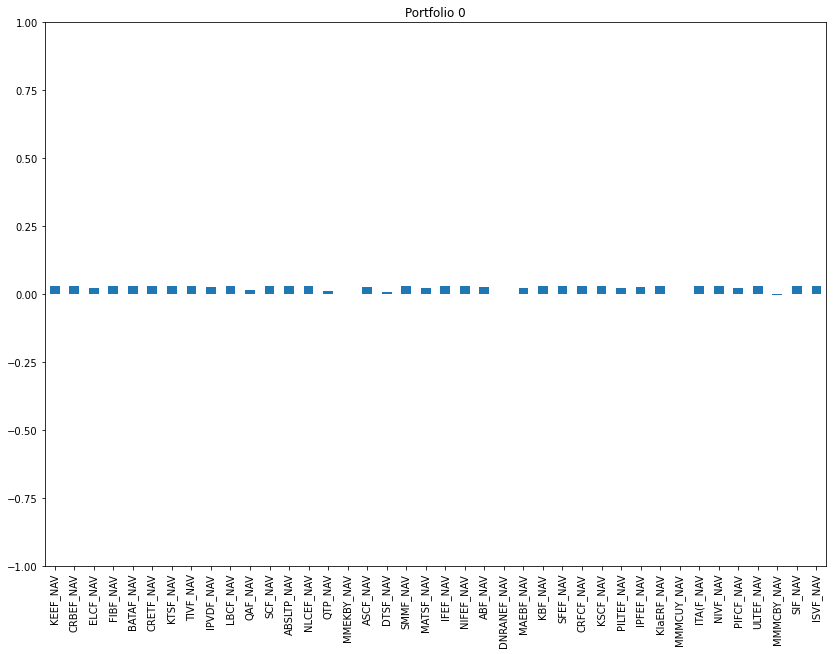

In [25]:
NumComponents=1
        
topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns=dataset.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range( NumComponents)]
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), figsize=(14,10), legend=False, sharey=True, ylim= (-1,1))

<AxesSubplot:>

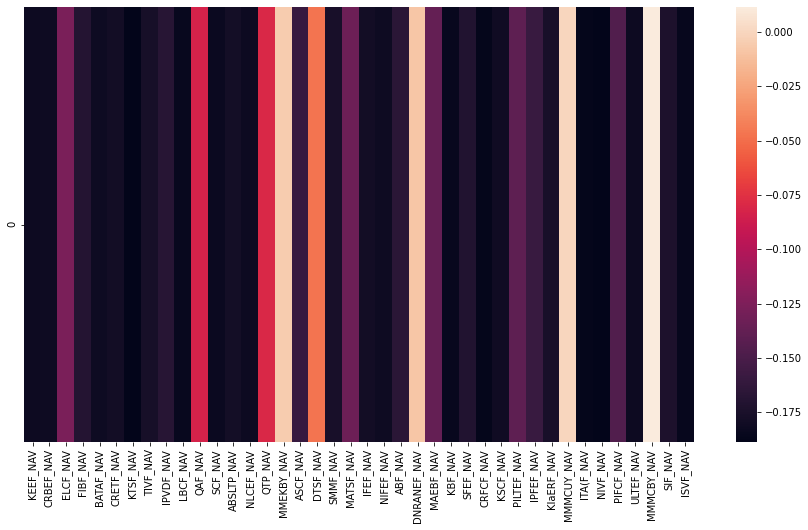

In [26]:
# plotting heatmap 
plt.figure(figsize = (15,8))
sns.heatmap(topPortfolios) 


The heatmap and the plot above shown the contribution of different stocks in each
eigenvector.

<a id='4.2.3'></a>
## 4.2.3. Finding the Best Eigen Portfolio

In order to find the best eigen portfolios and perform backtesting in the next step, we use the sharpe ratio, which is a performance
metric that explains the annualized returns against the annualized volatility of each company in a portfolio. A high sharpe ratio explains higher returns and/or lower volatility for the specified portfolio. The annualized sharpe ratio is computed by dividing
the annualized returns against the annualized volatility. For annualized return we
apply the geometric average of all the returns in respect to the periods per year (days
of operations in the exchange in a year). Annualized volatility is computed by taking the standard deviation of the returns and multiplying it by the square root of the peri‐
ods per year.

In [27]:
len(pca.components_)

40

In [28]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [29]:
len(pca.components_)

40

Eigen portfolio #0 with the highest Sharpe. Return 15.96%, vol = 9.35%, Sharpe = 1.71
   Return    Vol  Sharpe
0   0.160  0.094   1.707
4   0.174  0.104   1.675
5   0.178  0.114   1.559
7   0.179  0.146   1.226
1   0.076  0.099   0.769
9   0.273  0.361   0.756
3   0.163  0.748   0.218
6  -0.077  2.192  -0.035
2  -0.191  0.628  -0.305
8  -0.530  0.861  -0.615


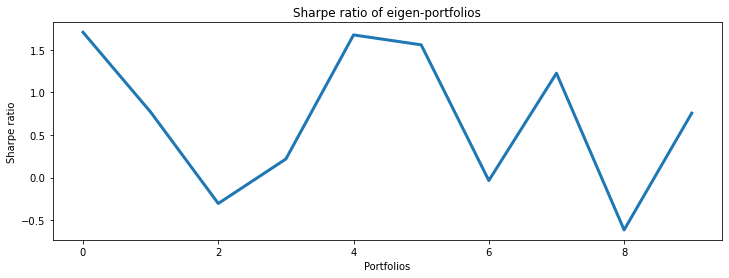

In [30]:
def optimizedPortfolio():
    n_portfolios = 10
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

optimizedPortfolio()

As shown from the results above, the portfolio 12 is the best portfolio and has the maximum sharp ratio out of all the porfolio. Let us look at the composition of this portfolio. 

Sum of weights of portfolio represented by first principal component: 100.00


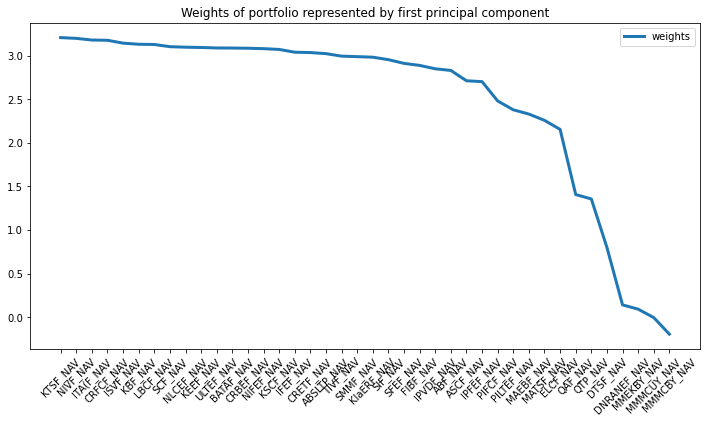

,weights
KTSF_NAV,3.208
NIVF_NAV,3.199
ITA(F_NAV,3.180
CRFCF_NAV,3.177
ISVF_NAV,3.144
KBF_NAV,3.131
LBCF_NAV,3.129
SCF_NAV,3.103
NLCEF_NAV,3.097
KEEF_NAV,3.094


In [36]:
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of portfolio represented by first principal component: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Weights of portfolio represented by first principal component', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[0], plot=True)

The chart shows the allocation of the best portfolio. The weights in the chart are in
percentages. 

In [32]:
weights[5]

array([-0.17298113,  0.14728953,  0.03033266,  0.11642054, -0.09923208,
        0.06601031,  0.02940994, -0.01729012,  0.15501456, -0.07339126,
       -0.02698377, -0.03286786, -0.00238341,  0.08868092, -0.04208791,
        0.63849421, -0.16227273,  0.16247311, -0.16122973, -0.04186214,
        0.01491969, -0.02830776,  0.15386477,  0.59409902, -0.11239821,
        0.10939241, -0.02434012,  0.08396016, -0.1799231 ,  0.12294726,
        0.2222986 , -0.14167368,  0.12285817, -0.03870466, -0.01792378,
        0.10466697,  0.08716723, -0.40926   , -0.11266208, -0.15252454])

<a id='4.2.4'></a>
## 4.2.4. Backtesting Eigenportfolio

We will now try to backtest this algorithm on the test set, by looking at few top and bottom portfolios.

Current Eigen-Portfolio:
Return = 86.30%
Volatility = 11.24%
Sharpe = 7.68


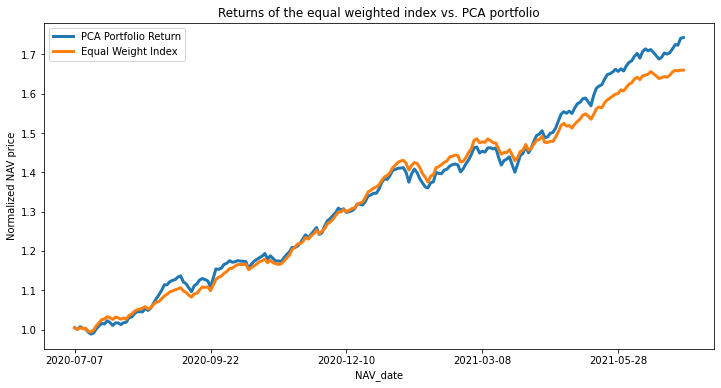

<Figure size 864x576 with 0 Axes>

Current Eigen-Portfolio:
Return = 284.61%
Volatility = 85.18%
Sharpe = 3.34


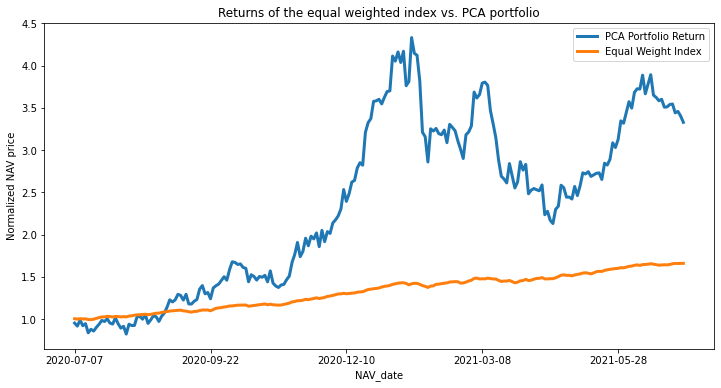

<Figure size 864x576 with 0 Axes>

Current Eigen-Portfolio:
Return = 77.96%
Volatility = 8.37%
Sharpe = 9.31


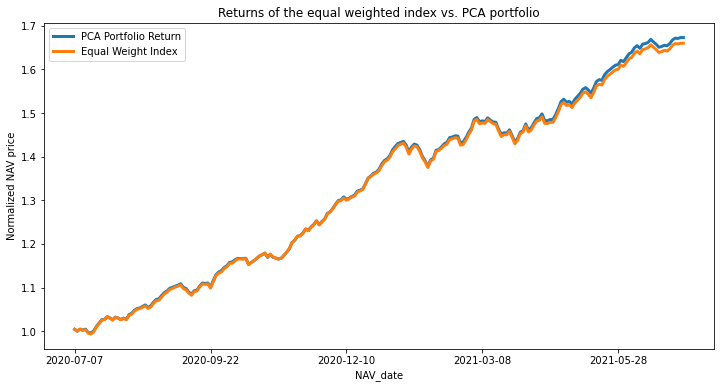

<Figure size 864x576 with 0 Axes>

In [33]:
def Backtest(eigen):

    '''

    Plots Principle components returns against real returns.
    
    '''
   
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)    

    eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_raw.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)  
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'PCA Portfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the equal weighted index vs. PCA portfolio' , 
                          figsize=(12,6), linewidth=3)
    plt.ylabel("Normalized NAV price")
    plt.figure(figsize = (12, 8))
    plt.show()
    
Backtest(eigen=weights[4])
Backtest(eigen=weights[8])
Backtest(eigen=weights[0])


Current Eigen-Portfolio:
Return = 77.96%
Volatility = 8.37%
Sharpe = 9.31


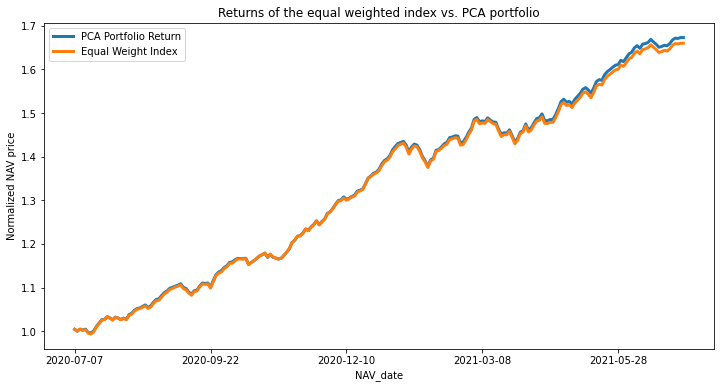

<Figure size 864x576 with 0 Axes>

Current Eigen-Portfolio:
Return = 67.54%
Volatility = 13.28%
Sharpe = 5.09


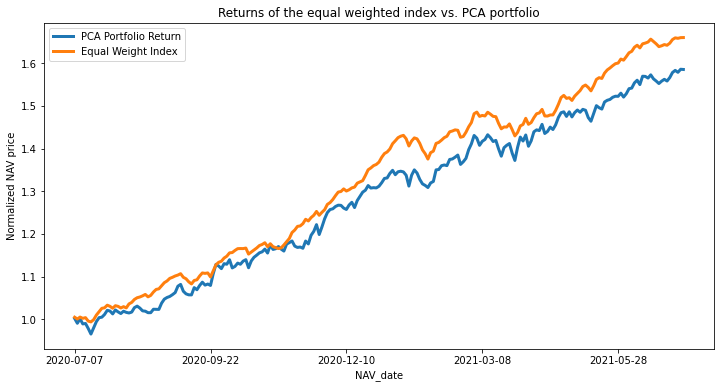

<Figure size 864x576 with 0 Axes>

Current Eigen-Portfolio:
Return = 105.73%
Volatility = 74.76%
Sharpe = 1.41


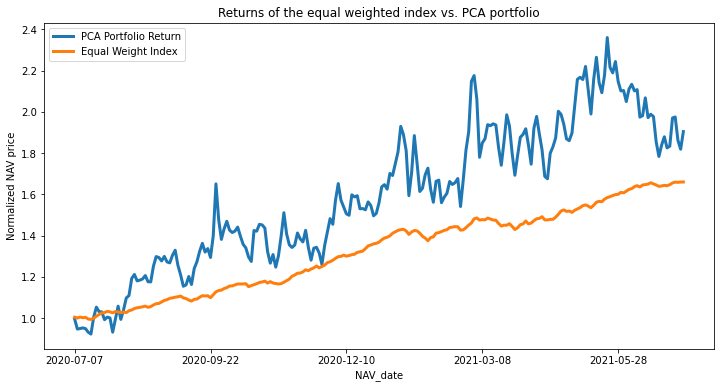

<Figure size 864x576 with 0 Axes>

Current Eigen-Portfolio:
Return = -4.94%
Volatility = 111.42%
Sharpe = -0.04


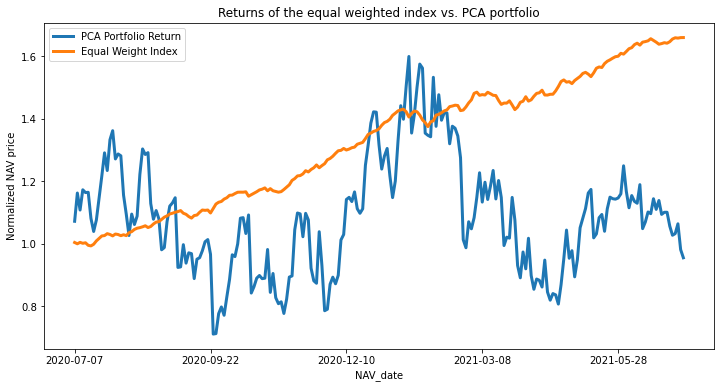

<Figure size 864x576 with 0 Axes>

Current Eigen-Portfolio:
Return = 86.30%
Volatility = 11.24%
Sharpe = 7.68


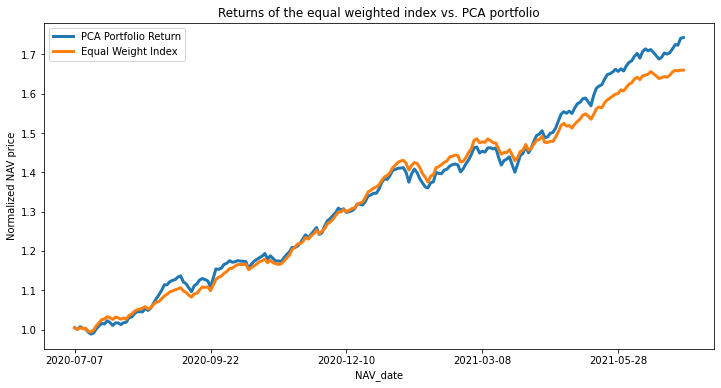

<Figure size 864x576 with 0 Axes>

Current Eigen-Portfolio:
Return = 88.35%
Volatility = 11.63%
Sharpe = 7.60


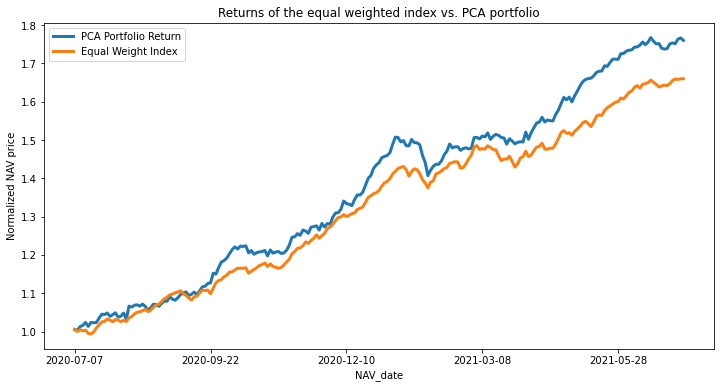

<Figure size 864x576 with 0 Axes>

Current Eigen-Portfolio:
Return = -98.78%
Volatility = 269.14%
Sharpe = -0.37


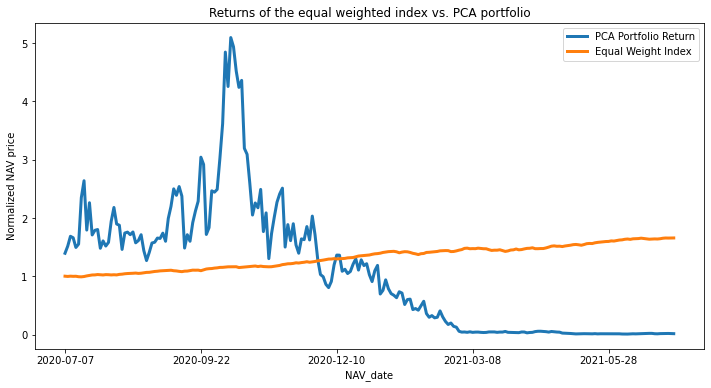

<Figure size 864x576 with 0 Axes>

Current Eigen-Portfolio:
Return = 57.90%
Volatility = 20.44%
Sharpe = 2.83


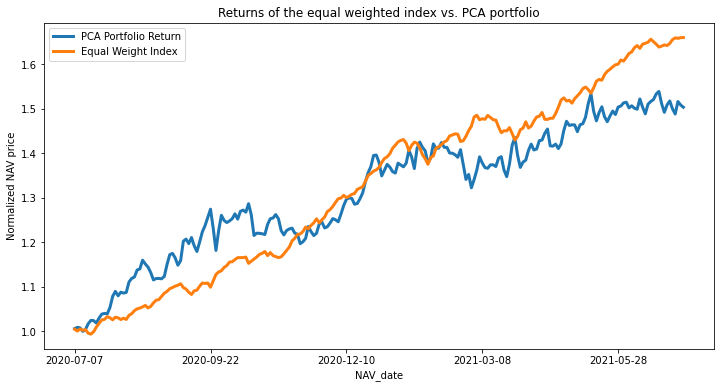

<Figure size 864x576 with 0 Axes>

Current Eigen-Portfolio:
Return = 284.61%
Volatility = 85.18%
Sharpe = 3.34


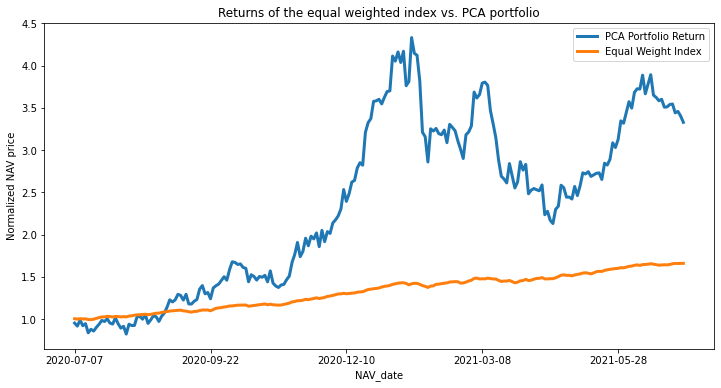

<Figure size 864x576 with 0 Axes>

Current Eigen-Portfolio:
Return = -67.80%
Volatility = 46.51%
Sharpe = -1.46


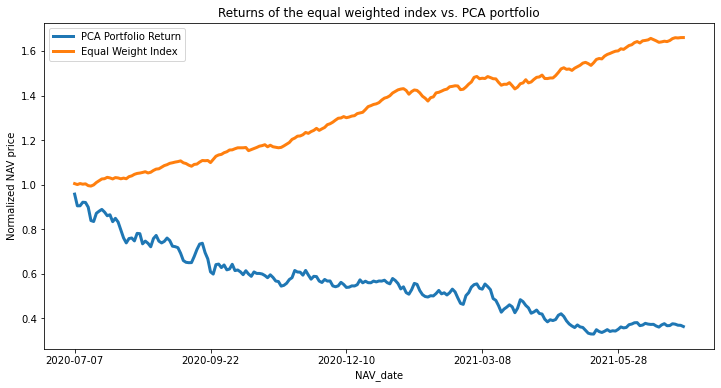

<Figure size 864x576 with 0 Axes>

Current Eigen-Portfolio:
Return = -42.41%
Volatility = 22.29%
Sharpe = -1.90


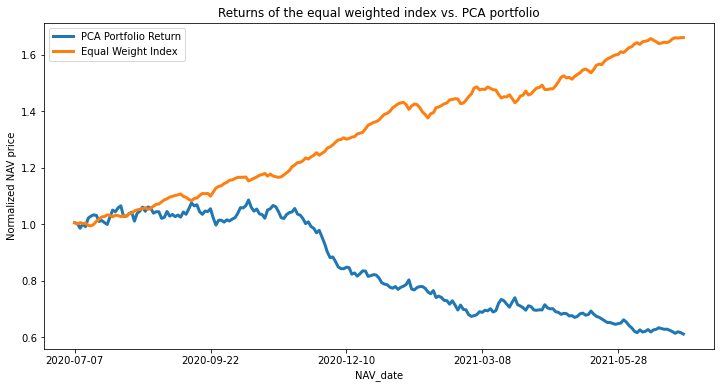

<Figure size 864x576 with 0 Axes>

In [34]:
for i in range(11):
    Backtest(eigen = weights[i])

Current Eigen-Portfolio:
Return = 88.35%
Volatility = 11.63%
Sharpe = 7.60


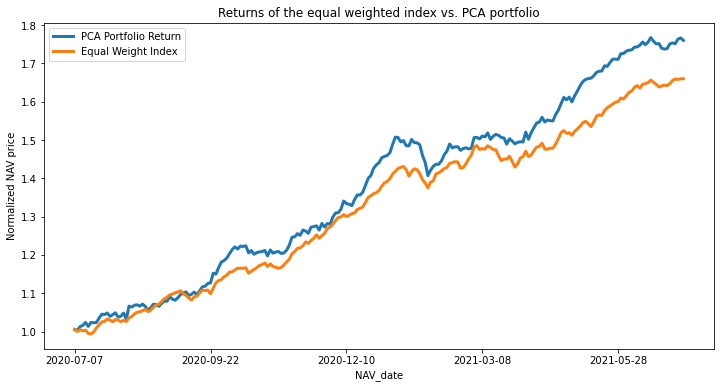

<Figure size 864x576 with 0 Axes>

In [35]:
Backtest(weights[5])

__Conclusion__

1. The portfolio given by the first principal component represents a systematic risk factor and the portfolios given by the other principal component may represent sector or industry factor. <br>
2. Since each of the principal component is uncorrelated and independent of each other, the portfolios given by them can be used for diversification of the portfolio resulting in reduction of risk.
